### Emma Klemets, 260775167   
Analysis and results for **Q4 & Q5** are in this notebook, the actual MCMC script is in MCMC_run.py, with saved runs files of chain, chi-squared and acceptance rate in files named similar to: "MCMCrun_chains.txt", "MCMCrun_chi.txt", "MCMCrun_AR.txt".   

As I couldn't get my Newton's method to give very good results, I am using the orginal parameters as initial guesses. I have also found that I still don't get convergence even with runs for 8000 steps (which took about 17 hrs to run). I think may be partially because my covarience matrix generated in #3 is not a great representation of the parameter corralations, the steps for MCMC without this matrix look better, but I still see a lot of over all movement in the paths on large scales.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import wmap_camb_example

import corner

In [72]:
variable_names = ['H_0', 'w_b h^2', 'w_c h^2', 'tau', 'A_s', 'slope']

#prints out values, std errors and 95% confidence interval for given chain
def printVals(chain):
    pars_new=np.mean(chain[20:,:], axis=0)
    std_new=np.std(chain[20:,:], axis=0)

    sortedChains = np.sort(np.transpose(chain), axis=1)

    for i, e in enumerate(pars_new):
        
        Min = sortedChains[i][int(0.025*len( sortedChains[0]))]
        Max = sortedChains[i][int(0.975*len( sortedChains[0]))]
        print("{}: {:.4}, std: {:.4}, 95% interval = [{:.4}, {:.4}]".format(variable_names[i], \
                                        e, std_new[i], Min, Max))
        

### 4) 
Now write a Markov-chain Monte Carlo where you fit the basic 6 parameters, including τ. However, note that we know the optical depth can’t be negative, so you should reject any steps that try to sample a negative τ. What are your parameter limits now? Please also present an argument as to why you think your chains are converged. As a reminder, you can draw samples of correlated data from a covariance matrix with   
r = np.linalg.cholesky(mat);   
d = np.dot(r, np.random.randn(r.shape[0])).    
You will want to use the covariance matrix from part 2) when drawing samples for the MCMC.

In [106]:
#loading MCMC saved chains

#real bad, start with og params
chain1 = np.loadtxt("MCMCrun_chains1.txt")
chi1 = np.loadtxt("MCMCrun_chi1.txt")

#ok, start with NM results, i think sampling is working
# chain1 = np.loadtxt("MCMCrun_chains2.txt")
# chi1 = np.loadtxt("MCMCrun_chi2.txt")

# chain1 = np.loadtxt("MCMCrun_chains.txt")
# chi1 = np.loadtxt("MCMCrun_chi.txt")
AR1 = np.loadtxt("MCMCrun_AR.txt")

#no covarience, only 9% AR
# chain1 = np.loadtxt("MCMCrun_chains_noCo.txt")
# chi1 = np.loadtxt("MCMCrun_chi_noCo.txt")
# AR1 = np.loadtxt("MCMCrun_AR_noCo.txt")

# #looks better, AR ~ %18, but still no knee
# chain1 = np.loadtxt("MCMCrun_chains3.txt")
# chi1 = np.loadtxt("MCMCrun_chi3.txt")


H_0: 82.19, std: 1.656, 95% interval = [78.8, 85.61]
w_b h^2: 0.02539, std: 0.0006023, 95% interval = [0.02407, 0.02644]
w_c h^2: 0.09401, std: 0.002798, 95% interval = [0.08815, 0.09885]
tau: 0.2896, std: 0.008051, 95% interval = [0.2761, 0.3046]
A_s: 3.167e-09, std: 5.022e-11, 95% interval = [3.083e-09, 3.273e-09]
slope: 1.068, std: 0.01331, 95% interval = [1.034, 1.095]

Ave acceptance rate:  0.474626380222909


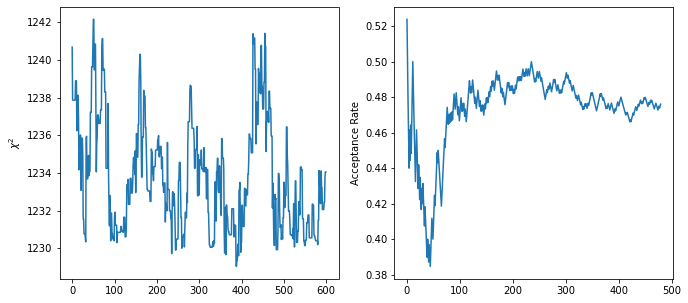

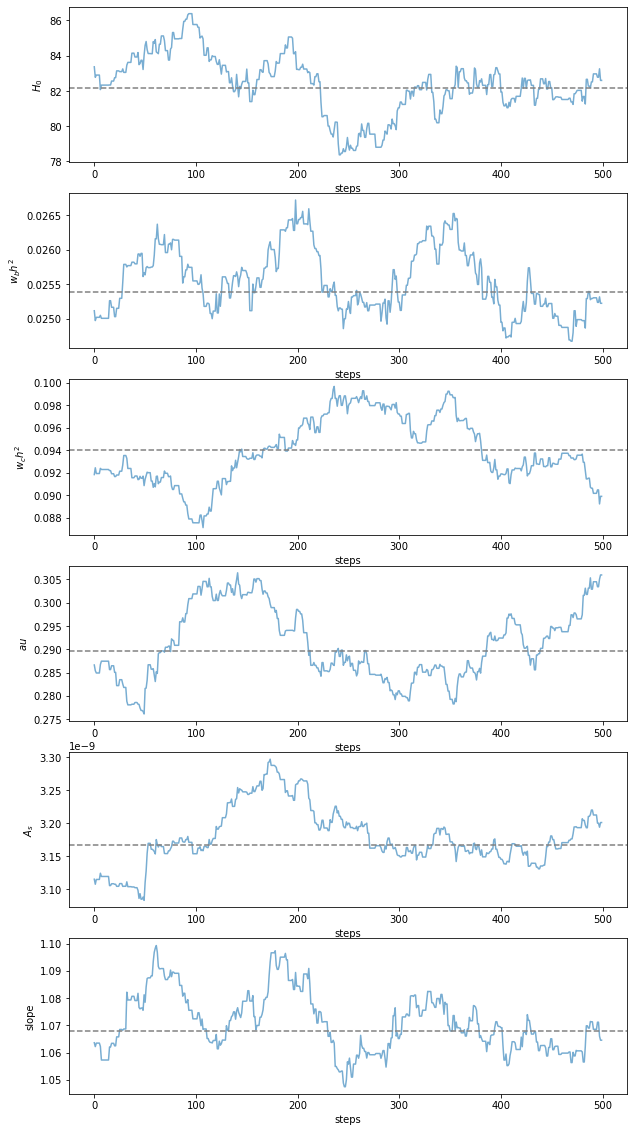

In [107]:
#get means and stds of chains
pars_new=np.mean(chain1[20:,:], axis=0)
std_new=np.std(chain1[20:,:], axis=0)
# print("Resulting values: ", pars_new, "with std", std_new )

printVals(chain1)
print("\nAve acceptance rate: ", np.mean(AR1))

#transpose chains for ease
paths = np.transpose(chain1)

#plot chi^2 and acceptance rate
fig, ax = plt.subplots(1, 2, figsize=(11,5))
ax[0].plot(chi1[:])
ax[0].set_ylabel("$\chi^2$")

ax[1].plot(AR1[20:])
ax[1].set_ylabel("Acceptance Rate")

plt.show()

#plot all the chains
variables = ['$H_0$', '$w_bh^2$', '$w_ch^2$', '$\tau$', '$A_s$', 'slope']

fig, ax = plt.subplots(6, 1, figsize=(10,20))
axs = ax.flatten()

for i, vchain in enumerate(paths):
    axs[i].plot(vchain[100:], alpha=0.6)
#     axs[i].set_title(variables[i])
    axs[i].axhline(pars_new[i], color='grey', ls="--", label="std")
    axs[i].set_xlabel('steps')
    axs[i].set_ylabel(variables[i])

plt.show()

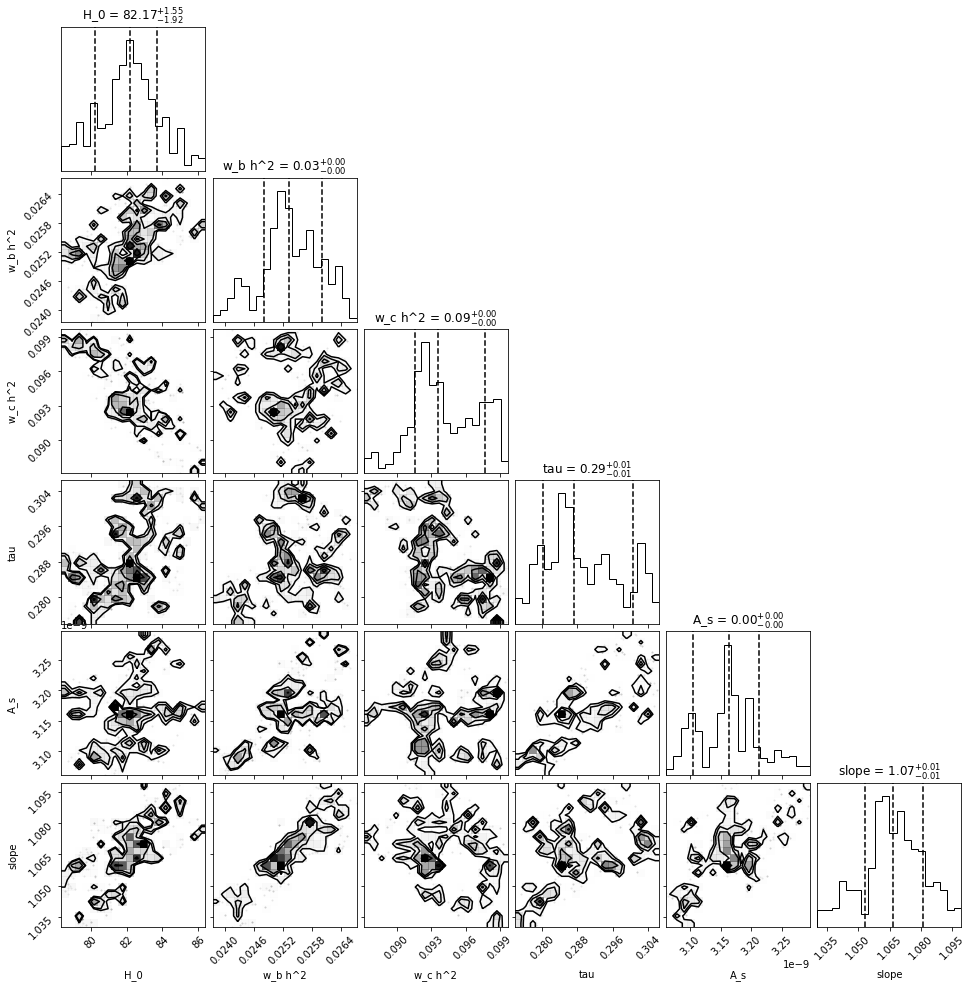

In [108]:
#corner plot to look at all the parameter corelation as histograms
figure = corner.corner(chain1, labels=variable_names, quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 12})

*Please also present an argument as to why you think your chains are converged*

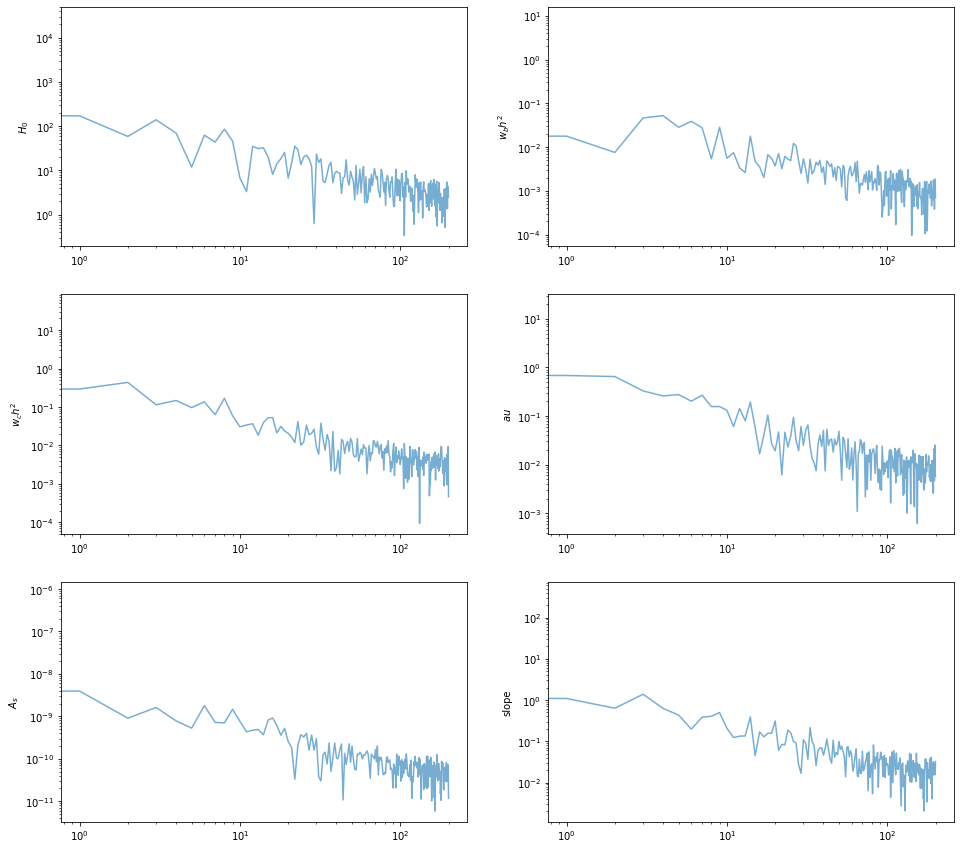

In [105]:
#fourier transform to power spectrum to look at convergence
fig, ax = plt.subplots(3, 2, figsize=(16,15))
axs = ax.flatten()

for i, vchain in enumerate(paths):
    
    axs[i].loglog(abs(np.fft.rfft(vchain[100:])), alpha=0.6, )
    axs[i].set_ylabel(variables[i])

plt.show()

In [35]:
#set this depending on where the break is seens
xbreak = 1.5e1/len(abs(np.fft.rfft(paths[0][100:])))
# print(xbreak, len(chain1))


#multiply by the total number of samples
print("Aprox number of indep samples: ", xbreak*len(chain1))

Aprox number of indep samples:  30.147723846849566


Looking at the square of the power spectrum, we would like to see a flat part for low frequencies and then a 'knee' where the incline increases alot. The x value there would indicate the number of independant samples. With a reasonable number of independant samples, this would imply convergence.

### 5) 
The Planck satellite has independently measured the CMB sky, and finds
that the optical depth is 0.0544 ± 0.0073. Run a chain where you add this in as a prior on the value of τ. What are your new parameter values/constraints?    
You can also take your chain from part 4) and importance sample it (weighting by the prior) with the Planck τ prior. How to those results compare to the full chain results?   

### Importance Sampling

In [79]:
# old likelihood, using chi squared
oldLike = np.exp(-0.5*(chi1))

#taking the error on the Planck value as gaussian
ga = np.random.normal(loc=0.0544, scale=0.0073, size=len(chi1))

#mutiply to get new likelihood
newLike =  oldLike*ga

In [80]:
#weighting means and std by new likelihood to get new results
smallerTau_means = []
smallerTau_scat = []
smallerTau_errs = []

for j in range(paths.shape[0]):
    smallerTau_means.append( np.sum(newLike*paths[j])/np.sum(newLike) )
    
    #subtract the mean from the orginal chain so we can calculate the
    #standard deviation
    smallerTau_scat.append(paths[j]-smallerTau_means[-1])
    smallerTau_errs.append(np.sqrt(np.sum(smallerTau_scat[-1]**2*newLike)/np.sum(newLike)))

In [81]:
print("Parameters and constraints from importance sampling:")
for i, e in enumerate(smallerTau_means):
    print("{}: {:.4}, std: {:.4}".format(variable_names[i], e, smallerTau_errs[i]))

Parameters and constraints from importance sampling:
H_0: 81.93, std: 3.977
w_b h^2: 0.02559, std: 0.0009478
w_c h^2: 0.0951, std: 0.005903
tau: 0.3099, std: 0.04493
A_s: 3.334e-09, std: 2.841e-10
slope: 1.075, std: 0.02917


*How to those results compare to the full chain results?*   

These values really aren't that close to the ones below, although with the full chain the value of tau is actually within the new limits for tau, the fit really did not converge with this prior enforced, and I would put more confidence in the importance sampled results.

### Rerun MCMC with smaller Tau prior

In [97]:
#loading MCMC saved chains
chain1 = np.loadtxt("MCMCrun_chains_tau.txt")
chi1 = np.loadtxt("MCMCrun_chi_tau.txt")
AR1 = np.loadtxt("MCMCrun_AR_tau.txt")

chain1 = np.loadtxt("MCMCrun_chains_tau1.txt")
chi1 = np.loadtxt("MCMCrun_chi_tau1.txt")
AR1 = np.loadtxt("MCMCrun_AR_tau1.txt")

H_0: 92.46, std: 3.337, 95% interval = [85.51, 98.33]
w_b h^2: 0.01972, std: 0.003768, 95% interval = [0.01375, 0.02682]
w_c h^2: 0.06169, std: 0.01401, 95% interval = [0.04264, 0.09192]
tau: 0.04916, std: 0.002627, 95% interval = [0.04714, 0.05745]
A_s: 2.265e-09, std: 7.554e-10, 95% interval = [1.276e-09, 3.785e-09]
slope: 0.9747, std: 0.1049, 95% interval = [0.8001, 1.127]

Ave acceptance rate:  0.020412566796275358


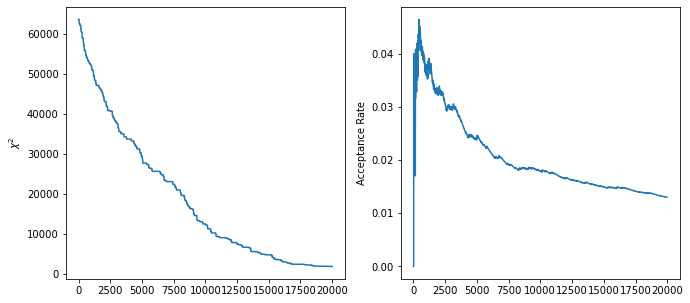

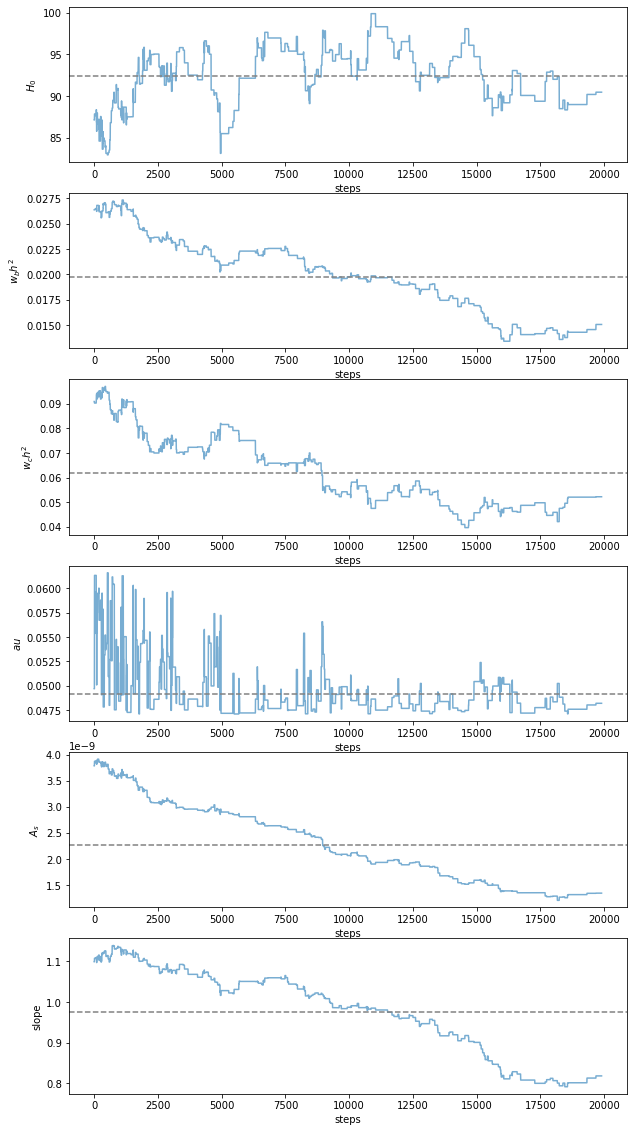

In [98]:
pars_new=np.mean(chain1[20:,:], axis=0)
std_new=np.std(chain1[20:,:], axis=0)
# print("Resulting values: ", pars_new, "with std", std_new )

printVals(chain1)
print("\nAve acceptance rate: ", np.mean(AR1))

paths = np.transpose(chain1)

fig, ax = plt.subplots(1, 2, figsize=(11,5))
ax[0].plot(chi1[:])
ax[0].set_ylabel("$\chi^2$")

ax[1].plot(AR1[20:])
ax[1].set_ylabel("Acceptance Rate")

plt.show()

variables = ['$H_0$', '$w_bh^2$', '$w_ch^2$', '$\tau$', '$A_s$', 'slope']

fig, ax = plt.subplots(6, 1, figsize=(10,20))
axs = ax.flatten()

for i, vchain in enumerate(paths):
    axs[i].plot(vchain[100:], alpha=0.6)
#     axs[i].set_title(variables[i])
    axs[i].axhline(pars_new[i], color='grey', ls="--", label="std")
    axs[i].set_xlabel('steps')
    axs[i].set_ylabel(variables[i])

plt.show()

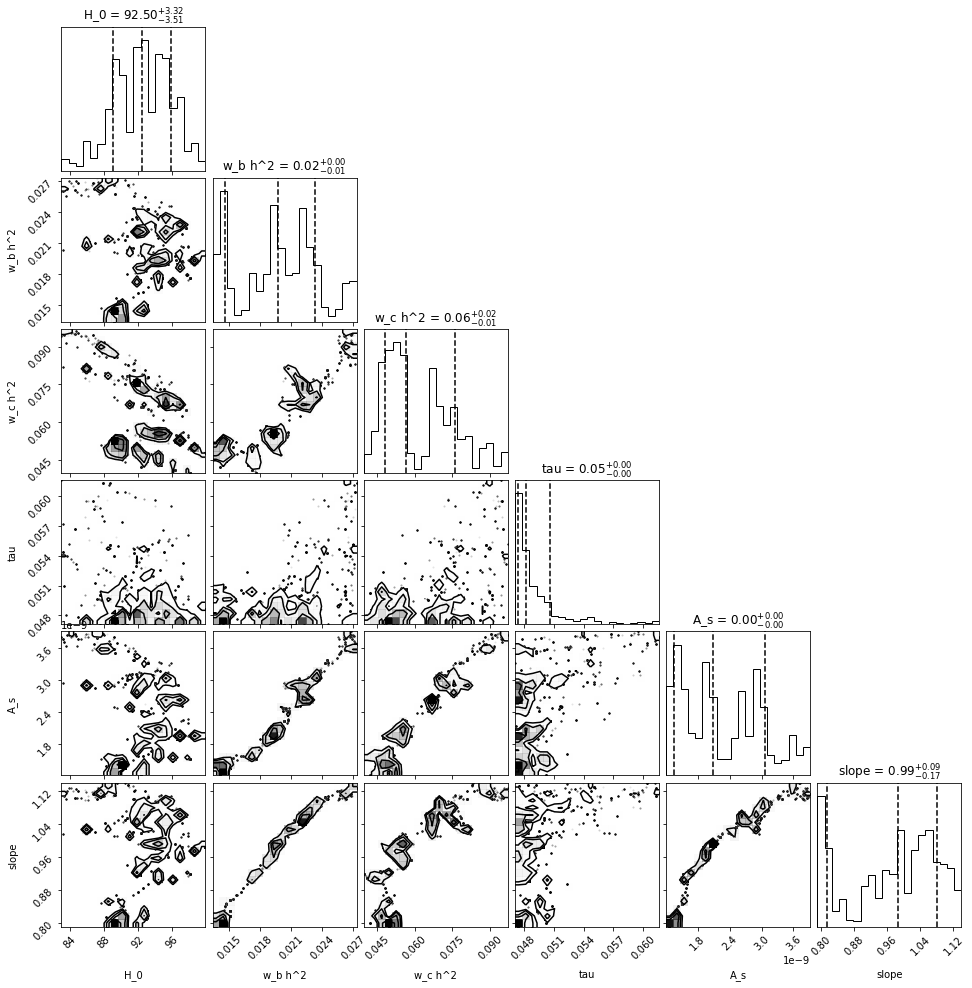

In [86]:
figure = corner.corner(chain1, labels=variable_names, quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 12})

*Please also present an argument as to why you think your chains are converged*

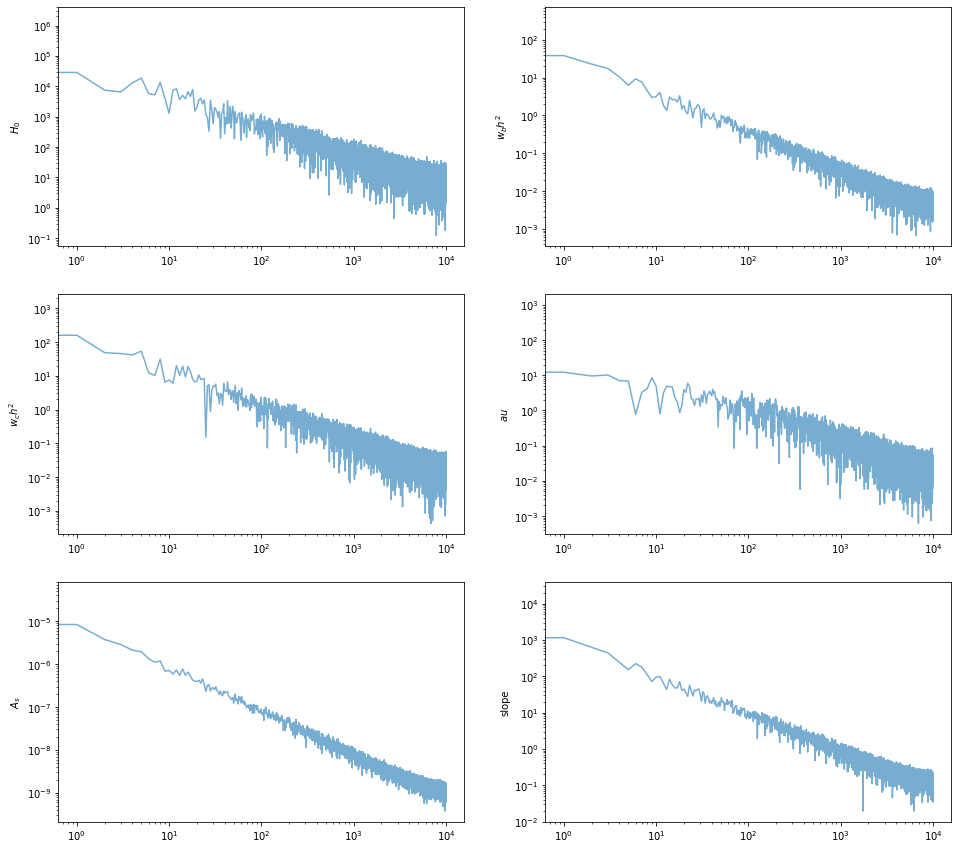

In [87]:
fig, ax = plt.subplots(3, 2, figsize=(16,15))
axs = ax.flatten()

for i, vchain in enumerate(paths):
    
    axs[i].loglog(abs(np.fft.rfft(vchain[100:])), alpha=0.6, )
    axs[i].set_ylabel(variables[i])

plt.show()

In [40]:
#set this depending on where the break is seens
xbreak = 1.5e1/len(abs(np.fft.rfft(paths[0][100:])))
# print(xbreak, len(chain1))


#multiply by the total number of samples
print("Aprox number of indep samples: ", xbreak*len(chain1))

Aprox number of indep samples:  30.147723846849566
